# RQ 1: dMn budgets

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
import datetime as dt

%matplotlib notebook

In [4]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

##### Load domain dimensions for reference:

In [5]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 
tmask = tmask[0,:,1480:2050,160:800]

In [6]:
ref   = nc.Dataset('/data/brogalla/run_storage/ref-2015/ANHA12_EXH006_2015_monthly.nc',  'r')
tlons = np.array(ref.variables['nav_lon'])
tlats = np.array(ref.variables['nav_lat'])
lons  = np.array(ref.variables['nav_lon'])[1480:2050,160:800]
lats  = np.array(ref.variables['nav_lat'])[1480:2050,160:800]
depth = np.array(ref.variables['deptht'])

In [7]:
# Load structure from sample dataset:
lat_model = ref.variables['nav_lat']
lon_model = ref.variables['nav_lon']
depths_model = ref.variables['deptht']
lat_model = np.array(lat_model)
lon_model = np.array(lon_model)
depths_model = np.array(depths_model)

### Load Mn model run results:

In [13]:
def load_results(folder_ref, folder_riv, folder_sed, folder_atm, folder_ice, folder_scav, folder_sink):
    
    file   = 'ANHA12_EXH006_2015_monthly.nc'
    ref_monthly  = nc.Dataset(folder_ref+file)
    riv_monthly  = nc.Dataset(folder_riv+file)
    sed_monthly  = nc.Dataset(folder_sed+file)
#     bio_monthly  = nc.Dataset(folder_bio+file)
    atm_monthly  = nc.Dataset(folder_atm+file)
    ice_monthly  = nc.Dataset(folder_ice+file)
    scav_monthly = nc.Dataset(folder_scav+file)
    sink_monthly = nc.Dataset(folder_sink+file)
    
    dmn_ref_monthly  = np.array(ref_monthly.variables['dissolmn'])[:,0,:,:,:]
    dmn_riv_monthly  = np.array(riv_monthly.variables['dissolmn'])[:,0,:,:,:]
    dmn_sed_monthly  = np.array(sed_monthly.variables['dissolmn'])[:,0,:,:,:]
#     dmn_bio_monthly  = np.array(bio_monthly.variables['dissolmn'])[:,0,:,:,:]
    dmn_atm_monthly  = np.array(atm_monthly.variables['dissolmn'])[:,0,:,:,:]
    dmn_ice_monthly  = np.array(ice_monthly.variables['dissolmn'])[:,0,:,:,:]
    dmn_scav_monthly = np.array(scav_monthly.variables['dissolmn'])[:,0,:,:,:]
    dmn_sink_monthly = np.array(sink_monthly.variables['dissolmn'])[:,0,:,:,:]
    
    tmask_full    = np.empty(dmn_ref_monthly.shape)
    tmask_full[:] = tmask
    
    dmn_mref  = np.ma.masked_where((tmask_full < 0.1), dmn_ref_monthly)
    dmn_mriv  = np.ma.masked_where((tmask_full < 0.1), dmn_riv_monthly)
    dmn_msed  = np.ma.masked_where((tmask_full < 0.1), dmn_sed_monthly)
#     dmn_mbio  = np.ma.masked_where((tmask_full < 0.1), dmn_bio_monthly)
    dmn_matm  = np.ma.masked_where((tmask_full < 0.1), dmn_atm_monthly)
    dmn_mice  = np.ma.masked_where((tmask_full < 0.1), dmn_ice_monthly)
    dmn_mscav = np.ma.masked_where((tmask_full < 0.1), dmn_scav_monthly)
    dmn_msink = np.ma.masked_where((tmask_full < 0.1), dmn_sink_monthly)

    return dmn_mref, dmn_mriv, dmn_msed, dmn_matm, dmn_mice, dmn_mscav , dmn_msink

In [14]:
folder_ref  = '/data/brogalla/run_storage/ref-2015/'
folder_riv  = '/data/brogalla/run_storage/comp-riv-off-2015/'
folder_sed  = '/data/brogalla/run_storage/comp-sed-off-2015/'
folder_atm  = '/data/brogalla/run_storage/comp-atm-off-2015/'
folder_ice  = '/data/brogalla/run_storage/comp-ice-off-2015/'
folder_scav = '/data/brogalla/run_storage/comp-sca-off-2015/'
folder_sink = '/data/brogalla/run_storage/comp-sink-off-2015/'

In [15]:
dmn_mref, dmn_mriv, dmn_msed, dmn_matm, dmn_mice, dmn_mscav, dmn_msink = \
        load_results(folder_ref, folder_riv, folder_sed, folder_atm, folder_ice, folder_scav, folder_sink)

Calculate the total amount of Mn in the surface layer (depth levels 0-17) for each month:

In [25]:
dmn_ref_sum = np.sum(dmn_mref[:,0:17,:,:], axis=(1,2,3))
dmn_riv_sum = np.sum(dmn_mriv[:,0:17,:,:], axis=(1,2,3))
dmn_sed_sum = np.sum(dmn_msed[:,0:17,:,:], axis=(1,2,3))
dmn_atm_sum = np.sum(dmn_matm[:,0:17,:,:], axis=(1,2,3))
dmn_ice_sum = np.sum(dmn_mice[:,0:17,:,:], axis=(1,2,3))
dmn_sca_sum = np.sum(dmn_mscav[:,0:17,:,:], axis=(1,2,3))
dmn_sin_sum = np.sum(dmn_msink[:,0:17,:,:], axis=(1,2,3))

<IPython.core.display.Javascript object>


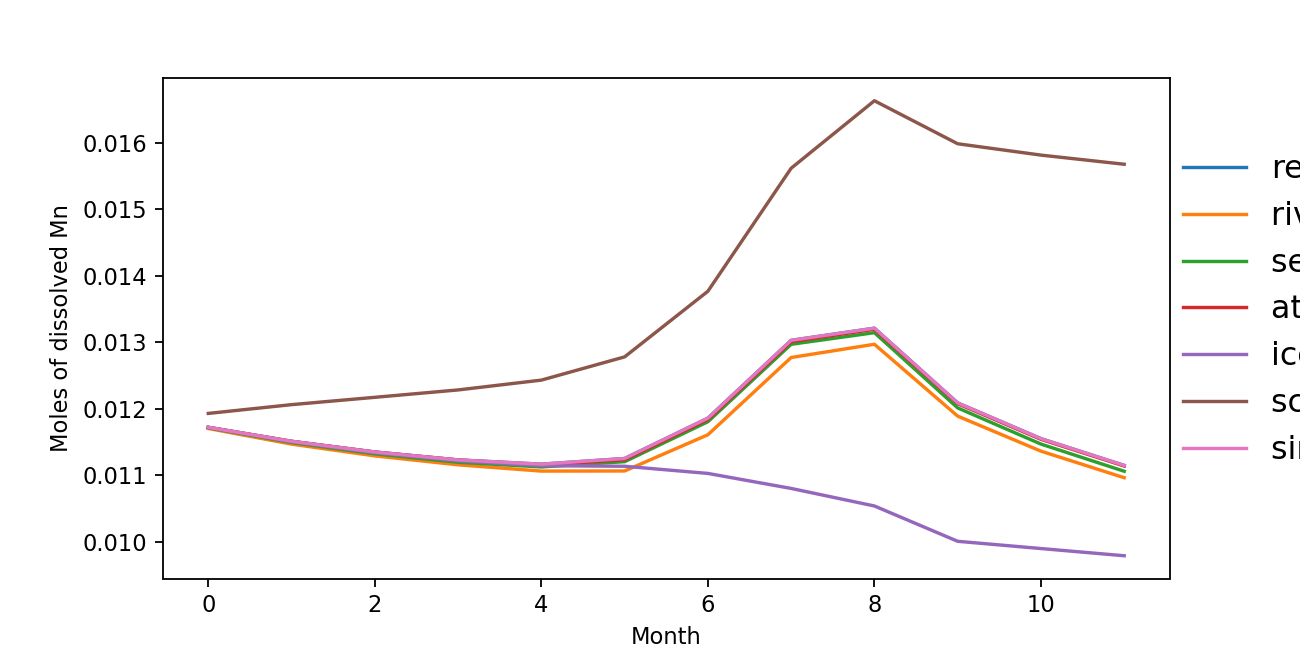

In [24]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(dmn_ref_sum, label='reference')
ax.plot(dmn_riv_sum, label='riv off')
ax.plot(dmn_sed_sum, label='sed off')
ax.plot(dmn_atm_sum, label='atm off')
ax.plot(dmn_ice_sum, label='ice off')
ax.plot(dmn_sca_sum, label='scav off')
ax.plot(dmn_sin_sum, label='sink off')

ax.set_ylabel('Moles of dissolved Mn')
ax.set_xlabel('Month')

ax.legend(fontsize=14, frameon=False, loc=(1.00, 0.2))

In [30]:
def calculate_prop(dmn_on, dmn_off):
    # Input arguments:
    # - dmn_on (t,z,y,x) --- concentration of dMn with component on
    # - dmn_off(t,z,y,x) --- concentration of dMn with component off
    
    # Contribution of component at each point
    diff     = np.subtract(dmn_on, dmn_off)
    diff_pos = np.ma.where((diff > 0), diff, np.zeros_like(diff))
    diff_neg = np.ma.where((diff < 0), diff, np.zeros_like(diff))
    
    # Output:
    # - prop(t,z,y,x)  --- proportional contribution of component to simulated [dMn]
    return diff_pos, diff_neg

In [31]:
def all_props(ref, riv, sed, atm, ice, scav, sink):
    
    riv_prop_pos, riv_prop_neg   = calculate_prop(ref, riv)
    sed_prop_pos, sed_prop_neg   = calculate_prop(ref, sed)
#     bio_prop  = calculate_prop(ref, bio)
    atm_prop_pos, atm_prop_neg   = calculate_prop(ref, atm)
    ice_prop_pos, ice_prop_neg   = calculate_prop(ref, ice)
    scav_prop_pos, scav_prop_neg = calculate_prop(ref, scav)
    sink_prop_pos, sink_prop_neg = calculate_prop(ref, sink)

    return riv_prop_pos, sed_prop_pos, atm_prop_pos, ice_prop_pos, scav_prop_pos, sink_prop_pos, \
            riv_prop_neg, sed_prop_neg, atm_prop_neg, ice_prop_neg, scav_prop_neg, sink_prop_neg

In [32]:
riv_prop_pos, sed_prop_pos, atm_prop_pos, ice_prop_pos, scav_prop_pos, sink_prop_pos, \
riv_prop_neg, sed_prop_neg, atm_prop_neg, ice_prop_neg, scav_prop_neg, sink_prop_neg = \
        all_props(dmn_mref, dmn_mriv, dmn_msed, dmn_matm, dmn_mice, dmn_mscav, dmn_msink)

### Bar plots

Load volume of grid cells:

In [40]:
imin, imax = 1480, 2050
jmin, jmax = 160, 800

In [41]:
e1t_base = np.array(mask.variables['e1t'])[0,imin:imax,jmin:jmax]
e2t_base = np.array(mask.variables['e2t'])[0,imin:imax,jmin:jmax]
e3t = np.array(mask.variables['e3t_0'])[0,:,imin:imax,jmin:jmax]

In [43]:
e1t    = np.tile(e1t_base, (50,1,1))
e2t    = np.tile(e2t_base, (50,1,1))

In [44]:
volume = e1t*e2t*e3t

In [45]:
atm_pos  = atm_prop_pos*volume
riv_pos  = riv_prop_pos*volume
sca_pos  = scav_prop_pos*volume
sed_pos  = sed_prop_pos*volume
ice_pos  = ice_prop_pos*volume
sink_pos = sink_prop_pos*volume

In [46]:
atm_neg  = atm_prop_neg*volume
riv_neg  = riv_prop_neg*volume
sca_neg  = scav_prop_neg*volume
sed_neg  = sed_prop_neg*volume
ice_neg  = ice_prop_neg*volume
sink_neg = sink_prop_neg*volume

In [47]:
dmn_riv_add = np.sum(riv_pos[:,0:17,:,:], axis=(1,2,3))
dmn_sed_add = np.sum(sed_pos[:,0:17,:,:], axis=(1,2,3))
dmn_atm_add = np.sum(atm_pos[:,0:17,:,:], axis=(1,2,3))
dmn_ice_add = np.sum(ice_pos[:,0:17,:,:], axis=(1,2,3))
dmn_sca_add = np.sum(sca_pos[:,0:17,:,:], axis=(1,2,3))
dmn_sca_rem = np.sum(sca_neg[:,0:17,:,:], axis=(1,2,3))
dmn_sin_add = np.sum(sink_pos[:,0:17,:,:], axis=(1,2,3))
dmn_sin_rem = np.sum(sink_neg[:,0:17,:,:], axis=(1,2,3))

<IPython.core.display.Javascript object>


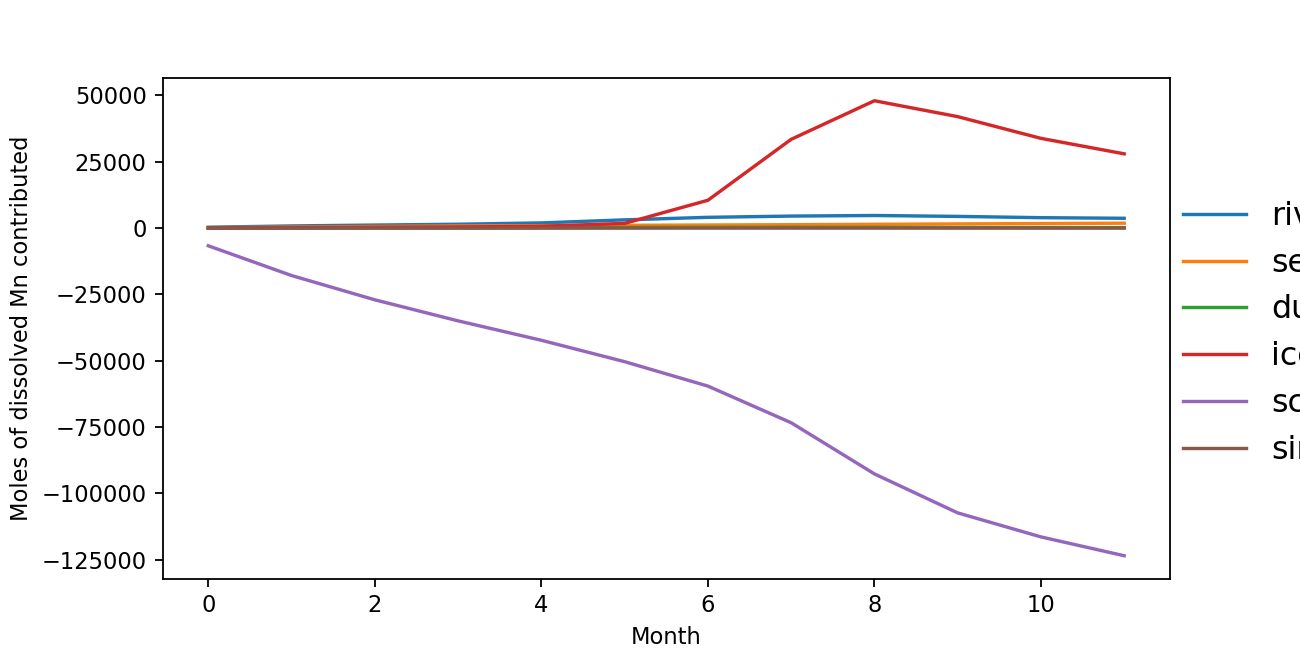

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(dmn_riv_add, label='river')
ax.plot(dmn_sed_add, label='sediment')
ax.plot(dmn_atm_add, label='dust')
ax.plot(dmn_ice_add, label='ice')
ax.plot(dmn_sca_add + dmn_sca_rem, label='scavenging')
ax.plot(dmn_sin_add + dmn_sin_rem, label='sink')

ax.set_ylabel('Moles of dissolved Mn contributed')
ax.set_xlabel('Month')

ax.legend(fontsize=14, frameon=False, loc=(1.00, 0.2))

### Overview of component contributions within water masses: 

- Polar mixed layer (0-40 m)
    - PML depth levels = 1 to 17
- Pacific/halocline water (40-300 m)
    - PW depth levels = 17 to 29
- Atlantic water (300-800 m)
    - AW depth levels = 29 to 35
- Deep water (> 800 m)
    - DW depth levels = 35-50
    
Note that if a component has a negative contribution (i.e. removal), I take the absolute value of this contribution. So, what I'm really looking at is the importance of the component in the concentration/distribution of the trace metal.